In [ ]:
import pandas as pd
MyData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/insurance - Copy.csv")

In [ ]:
MyData.shape

(1338, 4)

In [ ]:
print(MyData.head)
print(MyData.dtypes)

<bound method NDFrame.head of       age     bmi  children      charges
0      19  27.900         0  16884.92400
1      18  33.770         1   1725.55230
2      28  33.000         3   4449.46200
3      33  22.705         0  21984.47061
4      32  28.880         0   3866.85520
...   ...     ...       ...          ...
1333   50  30.970         3  10600.54830
1334   18  31.920         0   2205.98080
1335   18  36.850         0   1629.83350
1336   21  25.800         0   2007.94500
1337   61  29.070         0  29141.36030

[1338 rows x 4 columns]>
age           int64
bmi         float64
children      int64
charges     float64
dtype: object


In [ ]:
MyData.isnull().sum() 

age         0
bmi         0
children    0
charges     0
dtype: int64

In [ ]:
MyData.describe() 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#Checking different percentiles
pd.DataFrame(MyData['age']).describe(percentiles=(1,0.99,0.9,0.75,0.5,0.3,0.1,0.01))

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
1%,18.000000
10%,19.000000
30%,29.000000
50%,39.000000
75%,51.000000
90%,59.000000


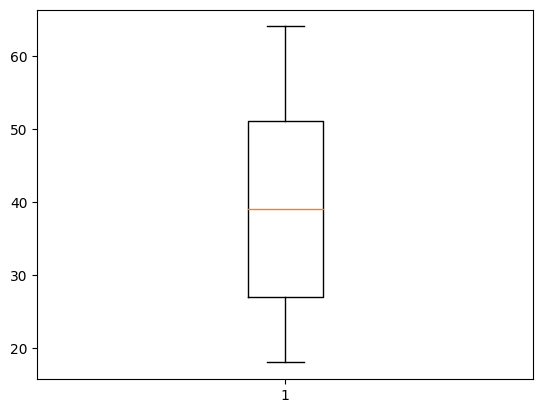

In [ ]:
#checking boxplot for Age column
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(MyData['age'])
plt.show()

In [ ]:
#Checking Outlier by definition and treating outliers

#getting median Age
Age_col_df = pd.DataFrame(MyData['age'])
Age_median = Age_col_df.median()

#getting IQR of Age column
Q3 = Age_col_df.quantile(q=0.75)
Q1 = Age_col_df.quantile(q=0.25)
IQR = Q3-Q1

#Deriving boundaries of Outliers
IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)

#Finding and treating outliers - both lower and upper end
MyData.loc[MyData['age']>IQR_UL , 'age'] = int(Age_col_df.quantile(q=0.90))
MyData.loc[MyData['age']<IQR_LL , 'age'] = int(Age_col_df.quantile(q=0.01))

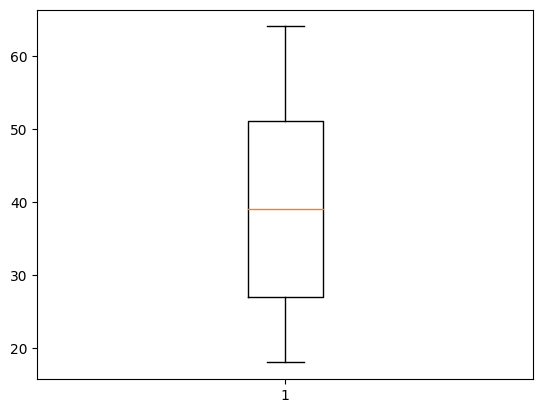

In [ ]:
#Check max age value now
max(MyData['age'])
plt.boxplot(MyData['age'])
plt.show()

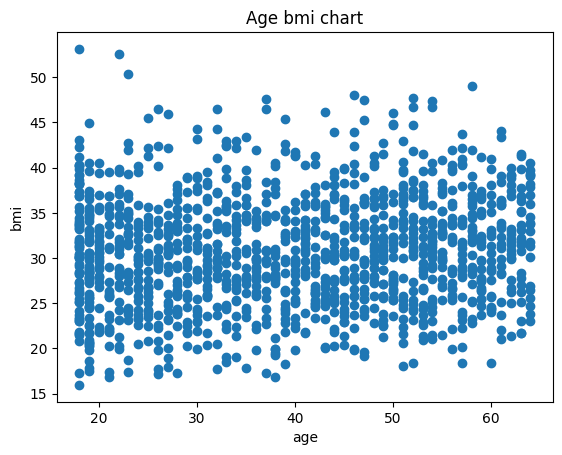

In [ ]:
#Check how Expense is varying with Age
x = MyData["age"]
y=  MyData["bmi"]
plt.scatter(x, y)
plt.title('Age bmi chart')
plt.xlabel('age')
plt.ylabel('bmi')
plt.show()

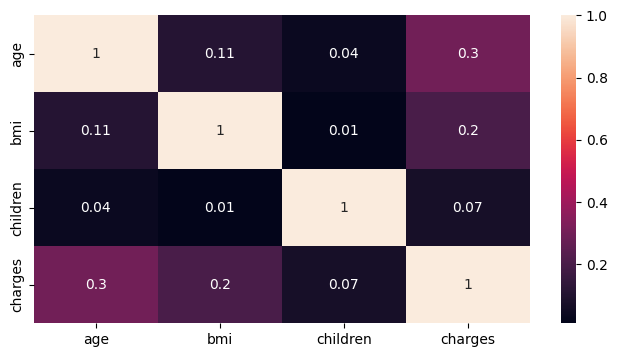

In [ ]:
#check correltion matrix - to check the strength of variation bwtween two variables
correlation_matrix= MyData.corr().round(2)
fgr, ax = plt.subplots(figsize =(8, 4)) 
import seaborn as sns
c = sns.heatmap(data=correlation_matrix, annot=True)
fgr.savefig("myimage.png")

In [ ]:
#Separating features and response
features = ["bmi","age"]
response = ["charges"]
x=MyData[features]
y=MyData[response]

#print(x)

#Normalization/scaling of data - understanding scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(MyData)
scaled_data

#converting data back to pandas dataframe
MyData_scaled = pd.DataFrame(scaled_data)
MyData_scaled.columns = MyData.columns

#Separating features and response
features = ["bmi","age"]
response = ["charges"]
x=MyData_scaled[features]
y=MyData_scaled[response]

In [ ]:
#Dividing data in test and train
#Importing neccesary packages
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

#Fitting lineaar regression model
model = LinearRegression()
model.fit(x_train, y_train)

#Checking accuracy on test data
accuracy = model.score(x_test,y_test)
print(accuracy*100,'%')

12.408525895570033 %


In [ ]:
import numpy as np

y_pred = model.predict(x_test)

print('R2_score : ',metrics.r2_score(y_pred,y_test))
print('MSE : ',metrics.mean_squared_error(y_pred,y_test))

R2_score :  -11.13087593914219
MSE :  0.043273822358024065


In [ ]:
x_test #the test data - predictors

,bmi,age
578,0.383105,0.739130
610,0.360775,0.630435
569,0.661959,0.652174
1034,0.603175,0.934783
198,0.056228,0.717391
...,...,...
787,0.562281,0.065217
823,0.372612,0.565217
1,0.479150,0.000000
589,0.396287,0.434783


In [ ]:
y_test #the actual values in test data - target column

,charges
578,0.137316
610,0.118531
569,0.711591
1034,0.188802
198,0.136035
...,...
787,0.012697
823,0.113288
1,0.009636
589,0.077495


In [ ]:
y_pred

array([[0.23677098],
       [0.21403943],
       [0.2696436 ],
       [0.30864006],
       [0.1767457 ],
       [0.12791548],
       [0.0903396 ],
       [0.26162611],
       [0.18392771],
       [0.16144108],
       [0.11692061],
       [0.21079023],
       [0.20138172],
       [0.137725  ],
       [0.13445531],
       [0.21977131],
       [0.2397726 ],
       [0.14914887],
       [0.17952976],
       [0.11812581],
       [0.20797114],
       [0.26864078],
       [0.23989583],
       [0.20691012],
       [0.13996322],
       [0.19424536],
       [0.08633735],
       [0.20439944],
       [0.13678942],
       [0.21169187],
       [0.18444664],
       [0.31386161],
       [0.30788106],
       [0.28097333],
       [0.08617907],
       [0.14315002],
       [0.25100049],
       [0.17480555],
       [0.20335782],
       [0.13023174],
       [0.12843441],
       [0.13941849],
       [0.17011374],
       [0.29070966],
       [0.13911053],
       [0.13113933],
       [0.2182436 ],
       [0.181

In [ ]:
print(model.intercept_ ) #checking the intercept of model equation
print(model.coef_)   #Checking the coefficients of model equation

[0.04240196]
[[0.17207552 0.17378   ]]


In [ ]:
print(model.predict([[40, 40000]]))
scaled_data = scaler.fit_transform([[40, 40000]])
print(model.predict(scaled_data))

[[6958.12540346]]
[[0.04240196]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_test = [1, 2, 3]
y_pred = [1, 2, 3]
metrics.r2_score(y_test, y_pred)

1.0